In [1]:
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Mouse C3KO-RichLi snRNA
####  2023-05-18 by Yi Zhao (Texas Heart Institute, US)
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Initiate  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
Ver <- '0'
Step <- 'PART11_Annotation_Cardio'
Project <- '2023_neoc3ko_rli'

Code_dir <- paste0('/Volumes/shire/project/', Project, '/code/mouse_v', Ver, '/')

source(Sys.readlink(paste0(Code_dir, 'src/bioinformatics.R')))
source(Sys.readlink(paste0(Code_dir, 'src/scRNAseq.R')))
source(Sys.readlink(paste0(Code_dir, 'src/scATACseq.R')))
source(paste0(Code_dir, 'mouse_v', Ver, '.helper_functions.R'))

InitiateProject('Rivendell', Ver, Step, 'mouse', Project, 'shire')

In [2]:
plan("multisession", workers = 8)
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Load data  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
srt <- readRDS('integrated/PART10.annotated.srt.rds')
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Excitatory Neuron annotation  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
sub.srt <- srt[, srt$Cell_type %in% c('Cardiomyocyte')]

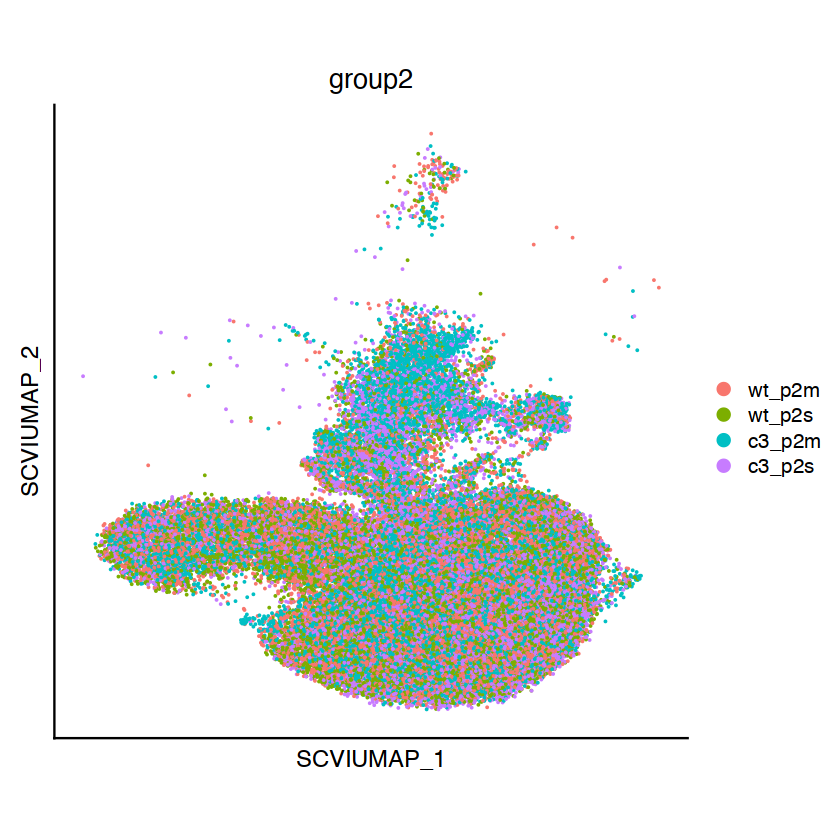

In [3]:
DimPlot2(sub.srt, group.by = 'group2')
mycol_sample <- mycol_10[1:4]

In [4]:
## Re-embed by scVI
sub.srt <- RunUMAP(sub.srt, reduction = 'scVI', dims = 1:50,
                  reduction.name = 'sub_scVI_umap', reduction.key = 'subSCVIUMAP_', verbose = FALSE)
sub.srt <- FindNeighbors(sub.srt, dims = 1:50, reduction = 'scVI', force.recalc = T, verbose = FALSE) %>%
        FindClusters(resolution = seq(0.1, 1, 0.1), verbose = FALSE)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"


In [5]:
p <- list(
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'group2', raster = T, pt.size = 0.2),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'Doublet_SC', raster = T, pt.size = 0.2),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'Cell_type', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.1', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.2', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.3', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.4', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.5', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.6', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.7', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.8', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.9', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.1', raster = T, pt.size = 0.2, label = T)
)
p <- wrap_plots(p, nrow = 4)
PlotPDF('1.0.umap.clusters', 20, 20)
p
dev.off()

pdf 
  2

In [6]:
## Annotate
Idents(sub.srt) <- 'RNA_snn_res.0.4'
mk <- FindAllMarkers(sub.srt, only.pos = T, return.thresh = 0.01, logfc.threshold = 0.5)
mk <- mk[mk$p_val_adj < 0.01, ]
p <- MarkerHeatmap(sub.srt, mk, n_cells = 500, top = 10)
PlotPDF('1.1.heat.marker_all_cluster', 15, 15)
p
dev.off()

PlotPDF('1.2.dim.all_cluster', 10, 10)
DimPlot2(sub.srt, reduction = 'sub_scVI_umap', label = T, cols = mycol_20)
dev.off()

PlotPDF('1.3.bar.doublet_in_all_cluster', 5, 5)
CountCellBarPlot(sub.srt, group.var = 'RNA_snn_res.0.4', stack.var = 'Doublet_SC', percentage = T)
dev.off()

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


pdf 
  2

pdf 
  2

Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(stack.var)

  # Now:
  data %>% select(all_of(stack.var))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."
Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(group.var)

  # Now:
  data %>% select(all_of(group.var))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."
`summarise()` has grouped output by 'Doublet_SC'. You can override using the
`.groups` argument.


$plot

$data
# A tibble: 22 × 3
# Groups:   StackVar [2]
   StackVar GroupVar Count
   <lgl>    <fct>    <int>
 1 FALSE    0        12781
 2 FALSE    1        10791
 3 FALSE    2         5822
 4 FALSE    3         6102
 5 FALSE    4         4335
 6 FALSE    5         4659
 7 FALSE    6         3379
 8 FALSE    7         1281
 9 FALSE    8          830
10 FALSE    9          136
# … with 12 more rows


pdf 
  2

In [7]:
gl <- Table(srt$Cell_type)
p <- FeaturePlot2(sub.srt, features = paste0('Score_', names(gl)), raster = T, min.cutoff = 0, max.cutoff = 4, ncol = 5)
PlotPDF('1.4.feat.cell_type_score', 30, 20)
p
dev.off()

Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
"The following requested variables were not found: Score_Myeloid, Score_T cell, Score_B cell, Score_Glial, Score_Doublet"
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is alrea

pdf 
  2

Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
"The following requested variables were not found: Score_Myeloid, Score_T cell, Score_B cell, Score_Glial, Score_Doublet"


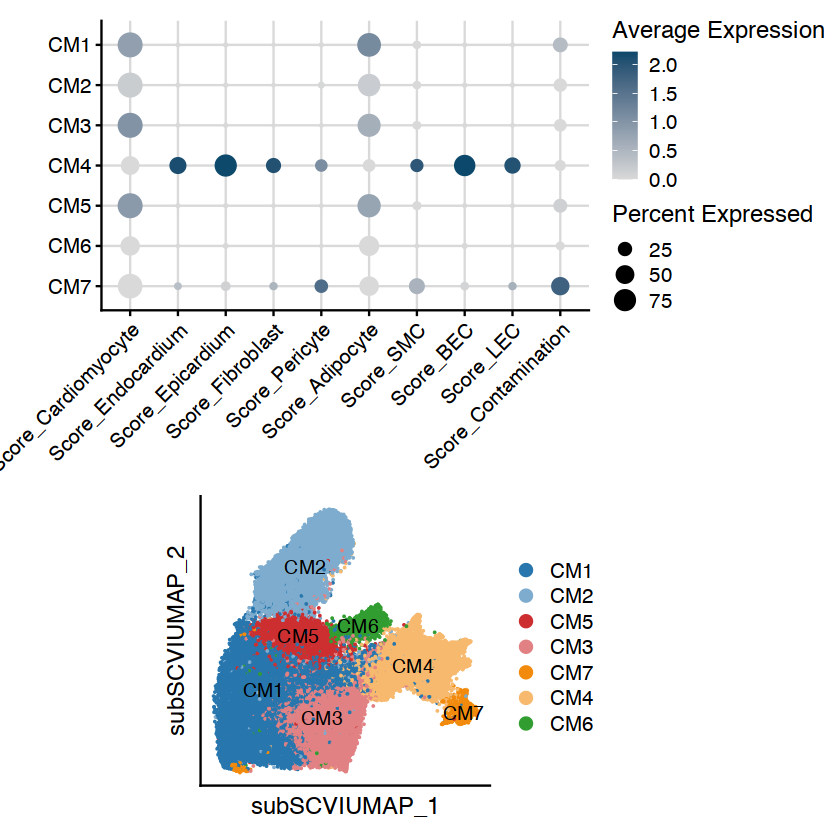

In [9]:
## Re-annotate
#Idents(sub.srt) <- 'RNA_snn_res.0.4'

sub.srt$Cell_state <- NA

sub.srt$Cell_state[sub.srt$RNA_snn_res.0.4 %in% c(0,3,10)] <- 'CM1'
sub.srt$Cell_state[sub.srt$RNA_snn_res.0.4 %in% c(4,6)] <- 'CM2'
sub.srt$Cell_state[sub.srt$RNA_snn_res.0.4 %in% c(1)] <- 'CM3'
sub.srt$Cell_state[sub.srt$RNA_snn_res.0.4 %in% c(2,9)] <- 'CM4'
sub.srt$Cell_state[sub.srt$RNA_snn_res.0.4 %in% c(5)] <- 'CM5'
sub.srt$Cell_state[sub.srt$RNA_snn_res.0.4 %in% c(7)] <- 'CM6'
sub.srt$Cell_state[sub.srt$RNA_snn_res.0.4 %in% c(8)] <- 'CM7'


Idents(sub.srt) <- 'Cell_state'
DotPlot2(sub.srt, features = paste0('Score_', levels(sub.srt$Cell_type)), group.by = 'Cell_state', col.min = 0) /
        DimPlot2(sub.srt, reduction = 'sub_scVI_umap', label = T, cols = mycol_20)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`




  CM1   CM2   CM3   CM4   CM5   CM6   CM7 
20709  9440 11590  6986  5059  1509   994 

pdf 
  2

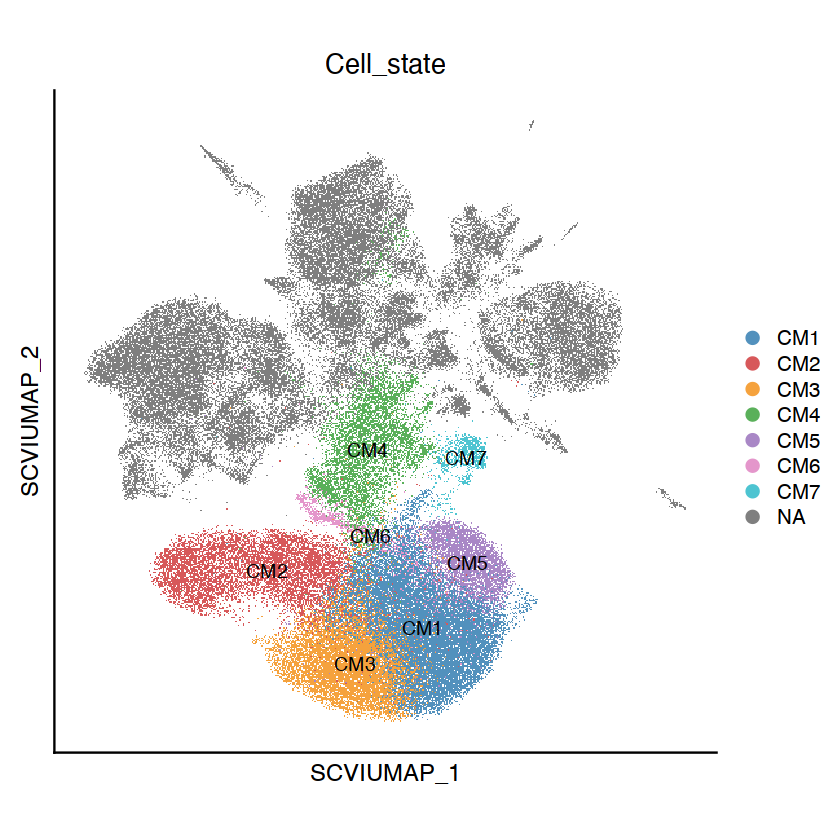

In [10]:
srt$Cell_state <- NA
srt$Cell_state[Cells(sub.srt)] <- sub.srt$Cell_state
DimPlot2(srt, reduction = 'scVI_umap', label = T, cols = mycol_10, group.by = 'Cell_state')

Table(sub.srt$Cell_state)


sub.srt$Cell_state <- factor(sub.srt$Cell_state, levels = c(
        'CM1',
        'CM2',
        'CM3',
        'CM4',
        'CM5',
        'CM6',
        'CM7'
))
Idents(sub.srt) <- 'Cell_state'
  
PlotPDF('2.dim.all_cluster_annotated', 8, 8)
DimPlot2(sub.srt, reduction = 'sub_scVI_umap', label = T, cols = c(mycol_20[1:12], 'grey80'), group.by = 'Cell_state')
dev.off()

In [11]:
mk <- FindAllMarkers(sub.srt, only.pos = T, return.thresh = 0.01, logfc.threshold = 0.25)
mk <- mk[mk$p_val_adj < 0.01, ]
p <- MarkerHeatmap(sub.srt, mk, n_cells = 500, top = 10)
PlotPDF('3.heat.maker_all_cluster', 15, 15)
p
dev.off()

WriteCSV(mk, title = 'cell_subtype_markers')

Calculating cluster CM1

Calculating cluster CM2

Calculating cluster CM3

Calculating cluster CM4

Calculating cluster CM5

Calculating cluster CM6

Calculating cluster CM7

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


pdf 
  2

In [12]:
## Re-embed without ambiguous cells
fb.srt <- sub.srt
fb.srt2 <- fb.srt[, fb.srt$Cell_state != 'Doublet']
fb.srt2 <- RunUMAP(fb.srt2, reduction = 'scVI', dims = 1:50, min.dist = 0.5,
                   reduction.name = 'sub_clean_scVI_umap', reduction.key = 'subcleanSCVIUMAP_', verbose = FALSE)
fb.srt@reductions$sub_clean_scVI_umap <- fb.srt@reductions$sub_scVI_umap
fb.srt@reductions$sub_clean_scVI_umap@cell.embeddings[, c(1,2)] <- NA
fb.srt@reductions$sub_clean_scVI_umap@cell.embeddings[Cells(fb.srt2), c(1,2)] <-
        fb.srt2@reductions$sub_clean_scVI_umap@cell.embeddings
colnames(fb.srt@reductions$sub_clean_scVI_umap@cell.embeddings) <-
        colnames(fb.srt2@reductions$sub_clean_scVI_umap@cell.embeddings)
fb.srt@reductions$sub_clean_scVI_umap@key <- fb.srt2@reductions$sub_clean_scVI_umap@key
PlotPDF('4.umap.Re_embed_annotated_reembed', 6, 6)
DimPlot2(fb.srt, reduction = 'sub_clean_scVI_umap', group.by = 'Cell_state', cols = mycol_10,  label = T)
dev.off()
sub.srt <- fb.srt

pdf 
  2

In [13]:
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
saveRDS(sub.srt, 'integrated/PART11.cardio_cells.srt.rds')

In [23]:
sub.srt <- DietSeurat(sub.srt, dimreducs = 'sub_scVI_umap', assay = 'RNA')
SaveH5ad(sub.srt, path = 'integrated/', name = 'PART11.annotated_cardio.gex.ann',
         assay = 'RNA', raw_count_only = T, verbose = T)

## Following code is for avoiding "_index" in adata.var bug
suppressMessages(library('anndata'))
adata <- read_h5ad('integrated/PART11.annotated_cardio.gex.ann.h5ad')
adata$raw <- NULL
adata$write_h5ad(filename = 'integrated/PART11.annotated_cardio.gex.ann.h5ad') ## replace the original
adata$X[1:10, 1:20]
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Raw matrix:



20 x 10 sparse Matrix of class "dgCMatrix"


  [[ suppressing 10 column names '2023_NeoC3KO_RLi:P01_S001:AGTACCAAGTCCTGCG-1', '2023_NeoC3KO_RLi:P01_S001:GGATGTTCAACGTAAA-1', '2023_NeoC3KO_RLi:P01_S001:ATTCCATTCCACCTGT-1' ... ]]



                                 
Xkr4          . . . 3 . . . . . .
Gm1992        . . . 1 . . . . . .
Gm19938       . . . . . . . . . .
Gm37381       . . . . . . . . . .
Rp1           . . . . . . . . . .
Sox17         . . . . . . . . . .
Gm37587       . . . . . . . . . .
Gm37323       . . . . . . . . . .
Mrpl15        2 . . 1 . 2 . . 1 .
Lypla1        . . . 1 1 . 2 . 1 1
Tcea1         . 1 1 1 2 2 . 1 . .
Rgs20         . . . . . . . . . .
Atp6v1h       . . . . . 2 . 1 . 3
Rb1cc1        . 4 4 1 3 2 1 1 5 .
4732440D04Rik . . 1 . 1 3 1 . 1 2
Alkal1        . . . . . . . . . .
St18          . . . . . . . . . .
Pcmtd1        2 1 2 . 2 1 2 . . 2
Gm26901       1 . . . . . . . . .
Gm30414       . . . . . . . . . .


Data matrix:



20 x 10 sparse Matrix of class "dgCMatrix"


  [[ suppressing 10 column names '2023_NeoC3KO_RLi:P01_S001:AGTACCAAGTCCTGCG-1', '2023_NeoC3KO_RLi:P01_S001:GGATGTTCAACGTAAA-1', '2023_NeoC3KO_RLi:P01_S001:ATTCCATTCCACCTGT-1' ... ]]



                                 
Xkr4          . . . 3 . . . . . .
Gm1992        . . . 1 . . . . . .
Gm19938       . . . . . . . . . .
Gm37381       . . . . . . . . . .
Rp1           . . . . . . . . . .
Sox17         . . . . . . . . . .
Gm37587       . . . . . . . . . .
Gm37323       . . . . . . . . . .
Mrpl15        2 . . 1 . 2 . . 1 .
Lypla1        . . . 1 1 . 2 . 1 1
Tcea1         . 1 1 1 2 2 . 1 . .
Rgs20         . . . . . . . . . .
Atp6v1h       . . . . . 2 . 1 . 3
Rb1cc1        . 4 4 1 3 2 1 1 5 .
4732440D04Rik . . 1 . 1 3 1 . 1 2
Alkal1        . . . . . . . . . .
St18          . . . . . . . . . .
Pcmtd1        2 1 2 . 2 1 2 . . 2
Gm26901       1 . . . . . . . . .
Gm30414       . . . . . . . . . .


Scaled Data matrix:

No scaled data slot

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

Adding variable features for RNA

Adding feature-level metadata for RNA

Adding cell embeddings for sub_scVI_umap

No loadings for sub_scVI_umap

No projected loadings for sub_scVI_umap

No standard deviations for sub_scVI_umap

No JackStraw data for sub_scVI_umap

Validating h5Seurat file

Adding data from RNA as X

Transfering meta.features to var

Adding counts from RNA as raw

Transfering meta.features to raw/var

Transfering meta.data to obs

Adding dimensional reduction information for sub_scVI_umap



None

  [[ suppressing 20 column names 'Xkr4', 'Gm1992', 'Gm19938' ... ]]



10 x 20 sparse Matrix of class "dgTMatrix"
                                                                              
2023_NeoC3KO_RLi:P01_S001:AGTACCAAGTCCTGCG-1 . . . . . . . . 2 . . . . . . . .
2023_NeoC3KO_RLi:P01_S001:GGATGTTCAACGTAAA-1 . . . . . . . . . . 1 . . 4 . . .
2023_NeoC3KO_RLi:P01_S001:ATTCCATTCCACCTGT-1 . . . . . . . . . . 1 . . 4 1 . .
2023_NeoC3KO_RLi:P01_S001:GAATAGACACCATTCC-1 3 1 . . . . . . 1 1 1 . . 1 . . .
2023_NeoC3KO_RLi:P01_S001:ATTCCCGAGCTGACAG-1 . . . . . . . . . 1 2 . . 3 1 . .
2023_NeoC3KO_RLi:P01_S001:TCATTACTCACAAGAA-1 . . . . . . . . 2 . 2 . 2 2 3 . .
2023_NeoC3KO_RLi:P01_S001:AAGTACCAGTAGTCCT-1 . . . . . . . . . 2 . . . 1 1 . .
2023_NeoC3KO_RLi:P01_S001:TCAGTCCTCTGACGCG-1 . . . . . . . . . . 1 . 1 1 . . .
2023_NeoC3KO_RLi:P01_S001:TCAGCCTGTTTCGCTC-1 . . . . . . . . 1 1 . . . 5 1 . .
2023_NeoC3KO_RLi:P01_S001:GACCCAGGTTACGTAC-1 . . . . . . . . . 1 . . 3 . 2 . .
                                                  
2023_NeoC3KO_RLi:P01_S001:AGTACCAAGTC

In [14]:
sub.srt <- readRDS(file = 'integrated/PART11.cardio_cells.srt.rds')
sub.srt <- sub.srt[, !sub.srt$Cell_state %in% c('Doublet')]

In [15]:
PlotPDF('4.1.0.bar.annotated_composition', 5, 5)
CountCellBarPlot(sub.srt, group.var = 'Cell_state', stack.var = 'group1', percentage = T)
dev.off()

`summarise()` has grouped output by 'group1'. You can override using the
`.groups` argument.


$plot

$data
# A tibble: 56 × 3
# Groups:   StackVar [8]
   StackVar GroupVar Count
   <fct>    <fct>    <int>
 1 wt_p2m1  CM1       2608
 2 wt_p2m1  CM2       1644
 3 wt_p2m1  CM3       1482
 4 wt_p2m1  CM4        573
 5 wt_p2m1  CM5        688
 6 wt_p2m1  CM6        253
 7 wt_p2m1  CM7        121
 8 wt_p2m2  CM1       2762
 9 wt_p2m2  CM2       1047
10 wt_p2m2  CM3       1495
# … with 46 more rows


pdf 
  2

In [16]:
PlotPDF('4.2.dim.all_cluster_annotated', 16, 8)
DimPlot2(sub.srt, reduction = 'sub_scVI_umap', label = T, cols = c(mycol_20[1:12], 'grey80'), group.by = 'Cell_state',split.by = 'group2')
dev.off()

pdf 
  2

In [17]:
PlotPDF('4.1.1.bar.annotated_composition', 5, 5)
CountCellBarPlot(sub.srt, group.var = 'group1', stack.var = 'Cell_state', percentage = T)
dev.off()

`summarise()` has grouped output by 'Cell_state'. You can override using the
`.groups` argument.


$plot

$data
# A tibble: 56 × 3
# Groups:   StackVar [7]
   StackVar GroupVar Count
   <fct>    <fct>    <int>
 1 CM1      wt_p2m1   2608
 2 CM1      wt_p2m2   2762
 3 CM1      wt_p2s1   1843
 4 CM1      wt_p2s2   2691
 5 CM1      c3_p2m1   2779
 6 CM1      c3_p2m2   2783
 7 CM1      c3_p2s1   3577
 8 CM1      c3_p2s2   1666
 9 CM2      wt_p2m1   1644
10 CM2      wt_p2m2   1047
# … with 46 more rows


pdf 
  2

In [18]:
PlotPDF('4.1.2.bar.annotated_composition', 5, 5)
CountCellBarPlot(sub.srt, group.var = 'group2', stack.var = 'Cell_state', percentage = T)
dev.off()

`summarise()` has grouped output by 'Cell_state'. You can override using the
`.groups` argument.


$plot

$data
# A tibble: 28 × 3
# Groups:   StackVar [7]
   StackVar GroupVar Count
   <fct>    <fct>    <int>
 1 CM1      wt_p2m    5370
 2 CM1      wt_p2s    4534
 3 CM1      c3_p2m    5562
 4 CM1      c3_p2s    5243
 5 CM2      wt_p2m    2691
 6 CM2      wt_p2s    2909
 7 CM2      c3_p2m    2134
 8 CM2      c3_p2s    1706
 9 CM3      wt_p2m    2977
10 CM3      wt_p2s    2871
# … with 18 more rows


pdf 
  2

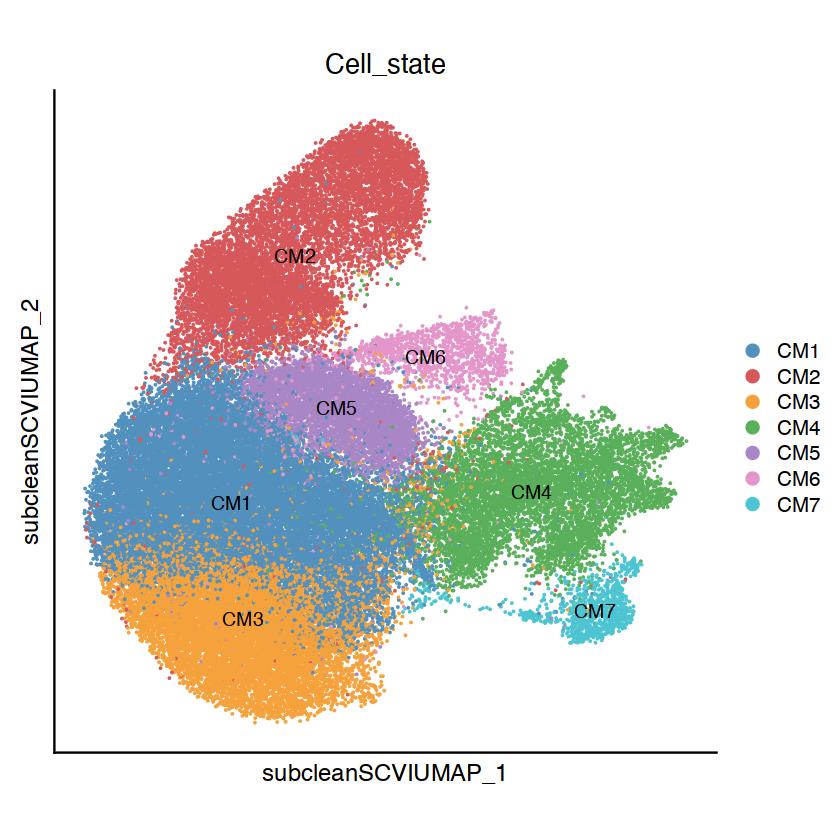

In [19]:
DimPlot2(sub.srt, reduction = 'sub_clean_scVI_umap', group.by = 'Cell_state', cols = mycol_10,  label = T)

In [20]:
p7 <- FeaturePlot2(sub.srt, features = 'Score_Cardiomyocyte', reduction = 'sub_clean_scVI_umap')
PlotPDF('4.3.feat.cell_type_score', 12, 12)
p7
dev.off()

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


pdf 
  2

In [21]:
PlotPDF('4.4.dim.all_cluster_annotated', 16, 8)
DimPlot2(sub.srt, reduction = 'sub_clean_scVI_umap', label = T, cols = c(mycol_20[1:12], 'grey80'), group.by = 'Cell_state',split.by = 'group2')
dev.off()

pdf 
  2

In [22]:
p9 <- FeaturePlot2(sub.srt, features = c('Tnnt2',  'Nppa', 'Acta2', 'Myh11'), reduction = 'sub_clean_scVI_umap',split.by = 'group2')
PlotPDF('5.0.cre_pc_features', 16, 12)
p9
dev.off()

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is

pdf 
  2